In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *

### Funciones Auxiliares

- Generar identidad(m:int)

- Genara inversa(A:matrizrala)

- Generar D(W:MatrizRala)

- Calcular diferencia entre vectores(A:MatrizRala, B:MatrizRala)

- Fill Matriz(mat:matrizRala)

In [3]:
def fillMatrix(mat:MatrizRala):
    # CITAS A-0
    mat[0,2] = 1
    mat[0,3] = 1
    mat[0,4] = 1

    # CITAS B-1
    mat[1,0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4
    mat[4,10] = 1

    # CITAS F-5
    mat[5,0] = 1
    mat[5,6] = 1

    # CITAS G-6
    mat[6,7] = 1
    mat[6,8] = 1

    # CITAS H-7
    mat[7,8] = 1

    # CITAS I-8
    mat[8,5] = 1

    # CITAS J-9
    mat[9,8] = 1
 

    # CITAS K-10

In [4]:
def generarD(W:MatrizRala):
    resultado = MatrizRala(W.shape[0],W.shape[1])
    
    for i in range(W.shape[0]):
        cantidad_1s = 0
        for j in range(W.shape[0]):
            if W[i,j] == 1:
                cantidad_1s += 1
        if cantidad_1s != 0:
            resultado[i,i] = 1/cantidad_1s
        
    return resultado

In [5]:
def generar_idt(m):
    
    B = MatrizRala(m,m)
    for i in range(B.shape[0]):
        B.__setitem__((i,i),1)
    
    return B
       
def generar_inv(A): 
    if A.shape[0] != A.shape[1]:
        raise ValueError("la matriz no es cuadrada")
        
    identidad = generar_idt(A)
    resultado = MatrizRala(A.shape[0],A.shape[0])
        
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            resultado[i,j] = A[i,j]
        
    for i in range(A.shape[0]):
        factor = 1.0 / A[i,i]
            
        for j in range(A.shape[0]):
            resultado[i,j] *= factor
            identidad[i,j] *= factor
                
        for k in range(A.shape[0]):
            if k!=i:
                factor = resultado[k,i]
                    
                for j in range(A.shape[0]):
                    resultado[k,j] -= factor*resultado[i,j]
                    identidad[k,j] -= factor*identidad[i,j]
                        
    return identidad   

In [6]:
def calcular_diferencia_entre_vectores(A:MatrizRala, B:MatrizRala):
    
    # Verificar que los vectores tengan la misma longitud
    if A.shape[0] != B.shape[0]:
        raise ValueError("Los vectores deben tener la misma longitud.")
    
    # Calcular la norma L1 de la diferencia entre los vectores
    dif = 0
    for i in range(A.shape[0]):
        diferencia_absoluta = abs(A[i,0] - B[i,0])
        dif += diferencia_absoluta
    
    return dif

### NumPy

Crear las matrices $\mathbf{W}$ y $\mathbf{D}$ para la Figura 3 utilizando NumPy.

In [7]:
filas = [0,0,0,1,4,5,5,6,6,6,7,8,9]
columnas = [2,3,4,0,10,6,0,7,8,0,9,5,8]

   
W = np.zeros((11, 11))
W[filas,columnas] = 1

   
D = np.zeros((11, 11))
for i in range(len(W)):
    cantidad_1s = 0
    for j in range(len(W)):
        if  W[i,j] == 1:
            cantidad_1s += 1
    if cantidad_1s != 0:
        D[i,i] = round((1/cantidad_1s),2)
        

Expresar la ecuacion como un sistema lineal $Ax = b$ y resolver para $p^∗$ utilizando $d = 0,85$ con NumPy

In [8]:
d = 0.85
N = W.shape[0]
I = np.eye(N)

A = I - (d*(np.dot(W,D)))
    
unos = np.ones((N, 1))
    
b = ((1-d)/N)*unos 

#con gauss jordan 
p_star = np.linalg.solve(A, b)

#con la inversa
#A_1 = np.linalg.pinv(A)

#p_star = np.dot(A_1,b)



### MatricesRalas

Crear las matrices $\mathbf{W}$ y $\mathbf{D}$ para la Figura 3 utilizando MatricesRalas.

In [9]:
W = MatrizRala(11,11)
fillMatrix(W)

D = generarD(W)

Si el sistema converge, encontraremos un vector de probabilidades p∗ con matrices ralas. Expresar la ecuacion como un sistema lineal (Ax = b) y resolver para p∗ utilizando d = 0, 85

Para expresar la ecuación como un sistema lineal $Ax = b$, primero necesitamos reorganizarla. Dado que $p^*$ es el vector de probabilidades que queremos encontrar, podemos escribir la ecuación como:

$p^* = \frac{1 - d}{N} \mathbf{1} + d \mathbf{W}\mathbf{D}p^*$

donde:
- $\mathbf{1}$ es un vector de unos de tamaño $Nx1$.
- $\mathbf{W}$ es la matriz que indica que paper cito al otro.
- $\mathbf{D}$ es la matriz diagonal que contiene la probabilidad dada que un paper sea citado en algun paper dado.
- $d$ probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
- $N$ es la cantidad de papers

Ahora, podemos reorganizar esta ecuación para obtener:

$p^* - d \mathbf{W}\mathbf{D}p^* = \frac{1 - d}{N} \mathbf{1}$

$p^* \left(\mathbf{I} - d \mathbf{W}\mathbf{D}\right) = \frac{1 - d}{N} \mathbf{1}$


Ahora, podemos expresar esto como un sistema lineal $Ax = b$, donde:
- $A = I - d\mathbf{W}\mathbf{D}$, siendo $I$ la matriz identidad.
- $x = p^*$.
- $b = \frac{1 - d}{N} \mathbf{1}$.

Esta es la forma en que podemos expresar la ecuación como un sistema lineal. Ahora, podemos utilizar métodos numéricos para resolver este sistema y encontrar el vector de probabilidades $p^*$.


In [10]:
N = W.shape[0]
I = generar_idt(N)

d = 0.85
WD = W @ D
A = I - (d * WD)

unos = MatrizRala(W.shape[0],1)

for i in range(unos.shape[0]):
    unos[i,0] = 1


b = ((1 - d)/N) * unos

#usando gauss jordan
p_star = GaussJordan(A,b)

#usando la inversa
# A_1 = generar_inv(A)
# p_star = A_1 @ b


Comparar el resultado obtenido con el metodo iterativo utilizando una distribucion equiprobable para la probabilidad inicial. Para realizar la comparaci´on, graficar la diferencia absoluta entre $p_{t}$ y $p^*$ para valores de t hasta ver que converge.

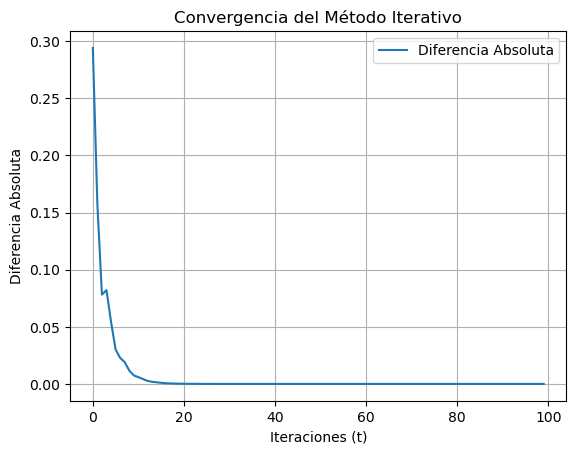

In [11]:
#calculo utilizando metodo iterativo 

# Vector de probabilidades inicial con distribución equiprobable
p = MatrizRala(N,1)
for i in range(N):
    p[i,0] = 1/N
    
unos = MatrizRala(N,1)
for i in range(N):
    unos[i,0] = 1
    
# Método iterativo
tolerancia = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
max_iteraciones = 100
diferencias = []


for t in range(max_iteraciones):
    p_previo = p.__copy__()
    parte_div = (1 - d) / N
    WD = W @ D
    WDP_t = WD @ p_previo
    p = parte_div * unos + d *WDP_t
    
    # Calcular la diferencia absoluta entre p y p*
    dif = calcular_diferencia_entre_vectores(p,p_star)
    
    diferencias.append(dif)
    
    if dif < tolerancia:
        print(f"Convergencia alcanzada en la iteración {t + 1}.")
        break

# Graficar la diferencia absoluta vs. t
plt.figure()
plt.plot(range(max_iteraciones), diferencias, label='Diferencia Absoluta')
plt.xlabel('Iteraciones (t)')
plt.ylabel('Diferencia Absoluta')
plt.title('Convergencia del Método Iterativo')
plt.legend()
plt.grid(True)
plt.show() 
    
    

In [12]:
print(p)
print(p_star)

MatrizRala([ 
    [ 0.02522727272727273  ]
    [ 0.020784090909090912  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.056733094477055365  ]
    [ 0.08458589074815162  ]
    [ 0.04572210310710899  ]
    [ 0.03774792878911217  ]
    [ 0.04572210310710899  ]
    [ 0.01363636363636364  ]
])
MatrizRala([ 
    [ 0.02522727272727273  ]
    [ 0.020784090909090912  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.01363636363636364  ]
    [ 0.05673309447705534  ]
    [ 0.0845858907481516  ]
    [ 0.045722103107108975  ]
    [ 0.03774792878911216  ]
    [ 0.045722103107108975  ]
    [ 0.01363636363636364  ]
])


Codigo Guido

In [17]:

def getMatDNump(W:np.ndarray)->np.ndarray:
    D = np.zeros_like(W)
    for i in range(D.shape[0]):
        if sum(W[i,:]) != 0:
            D[i,i] = 1/sum(W[i,:])
    return D


    
def nextP(P:np.ndarray,W,D,d)->np.ndarray:
    termino_1 = 1-d / W.shape[0]
    termino_1 = np.zeros_like(P) + 1 * termino_1
    termino_2 = d * W @ D @ P
    return termino_1 + termino_2

def getMatD(W:MatrizRala):
    N = W.shape[0]
    D = MatrizRala(N,N)
    for i in range(D.shape[0]):
        fila_i = W.return_fila_entera(i)
        cantCitas = fila_i.count(1)
        if cantCitas != 0:
            D[i,i] = cantCitas
    return D

def metodoIterativo(P,W,D,d,max_iter:int,dif:list):

    # Pt+1 = (1-d)/N 1 + d * W @ D * Pt


    M = d * W @ D
    print(M)
    # N = W.shape[0]

    # term_1 = MatrizRala(N,1)
    # for i in range(term_1.shape[0]):
    #     term_1[i,0] = (1-d) / N
    
    # for i in range(max_iter):
    #     print(M.shape,P.shape,flush=False)
    #     P_next = term_1 + M @ P
    #     vect_dif = P_next - P
    #     dif.append(vect_dif.sum())
    #     P = nextP
    # return nextP
    
    


In [19]:
def main():
    N = 11
    d = 0.85
    W = MatrizRala(N,N)
    fillMatrix(W)
    D = getMatD(W)

    # print(W,D)

    # MARCO TEORICO

    # P* = (1-d)/N 1 + d * W @ D * P*
    # P* - dWDP* = (1-d)/N * 1
    # (1 - dWD)P* = (1-d)/N * 1
    #     A     x =  b
    

    # METODO DE GAUSS JORDAN
    
    # A
    oneMat = MatrizRala.One(N)
    dWD = d * W @ D
    A = oneMat - dWD
    # print(A)

    # b
    b = MatrizRala(N,1)
    for i in range(N):
        b[i,0] = 1
    b = ((1-d)/N) * b

    x = GaussJordan(A,b)
    # print("GAUSS JORDAN: \n")
    # print(x)

    # METODO ITERATIVO

    # P = (1-d)/N 1 + d * W @ D * P
    P = MatrizRala(N,1)

    for i in range(N):
        P[i,0] = 1/N    

    
    
    max_iteraciones = 20
    diferencias = []    
    P_iterativo = metodoIterativo(P,W,D,d,max_iteraciones,diferencias)
    # print("ITERATIVO: \n")
    # print(P_iterativo)

    print("DIFERENCIAS: \n")
    print(P_iterativo - x)
    print("SUMA DIFERENCIAS: \n")
    print(int(P_iterativo.sum() - x.sum()))

if __name__ == "__main__":
    # mainNumpy()
    main()

MatrizRala([ 
    [ 0.0  0.0  0.0  0.0  0.85  0.0  0.0  0.0  0.0  0.0  0.0  ]
    [ 2.55  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
    [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ]
    [ 2.55  0.0  0.0  0.0  0.0  0.0  1.7  0.0  0.0  0.0  0.0  ]
    [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.85  0.85  0.0  0.0  ]
    [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.85  0.0  0.0  ]
    [ 0.0  0.0  0.0  0.0  0.0  1.7  0.0  0.0  0.0  0.0  0.0  ]
    [ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.85  0.0  0.0  ]
    [ 0  0  0  0  0  0  0  0  0  0  0  ]
])
DIFERENCIAS: 



TypeError: unsupported operand type(s) for -: 'NoneType' and 'MatrizRala'

In [25]:
A = MatrizRala(2,3)
B = MatrizRala(3,2)

A[0,0] = 1
A[0,1] = 0
A[0,2] = 0
A[1,0] = 0
A[1,1] = 1
A[1,2] = 0
A[2,0] = 0
A[2,1] = 0
A[2,2] = 1

B[0,0] = 1
B[0,1] = 2
B[0,2] = 3
B[1,0] = 4
B[1,1] = 5
B[1,2] = 6
B[2,0] = 7
B[2,1] = 8
B[2,2] = 9



print(A @ B)


MatrizRala([ 
    [ 1  2  ]
    [ 4  5  ]
])
